# Assignment 3

In [1]:
import numpy as np
import matplotlib.pylab as plt
import math as m
from scipy.optimize import curve_fit

## 1.Harmonic and Anharmonic Oscillators

In [2]:
#Define functions for equations of motion
def acciNext(acci,Xi,k,alpha,dt):
    accN = acci + (-1*k*Xi**alpha) *dt
    return accN

def xposiNext(Xi,acci,dt):
    xNext = Xi + acci * dt
    return xNext

#Method to eulerCramer
def oscillatorEC(k,alpha,dt,xo): #TAKES: k,alpha,timestep, and intial X position
                                 #RETURNS: time, and xPos Arrays(s)
    #Define Arrays
    time = np.arange(0,tmax+dt,dt)
    xPos = np.zeros(len(time))
    accVal = np.zeros(len(time)) #This does not need to be stored but Calculated it and memory is cheap
    #Set initial conditions
    xPos[0] = xo
    accVal[0] = 0
    
    #Enter loop for EulerCramer method.
    for i in range(1,len(xPos)):
        #Euler cramer stuff
        accVal[i] = acciNext(accVal[i-1],xPos[i-1],k,alpha,dt)
        xPos[i] = xposiNext(xPos[i-1],accVal[i],dt) 
        
    return time, xPos

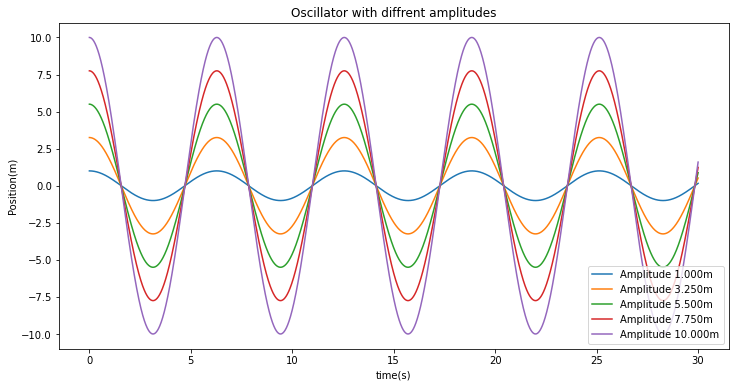

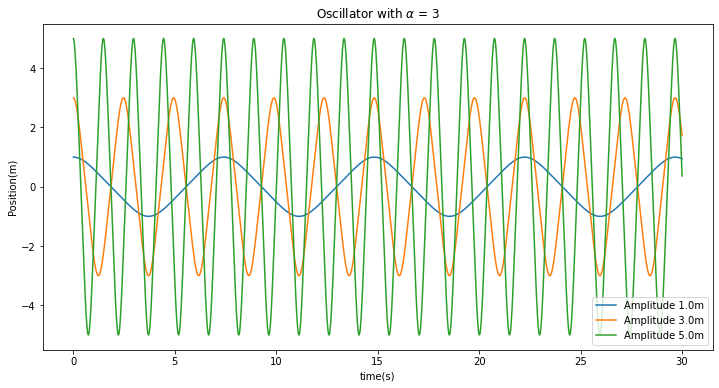

Amplitude(m)   Period(s)
1.0000         7.4100
3.0000         2.4700
5.0000         1.4800


In [3]:
#PLOT 1: Show equal amplitude:
plt.figure(figsize=(12,6))
#Define constants:
dt = 0.01
tmax = 30

#Loop 1 times with 10 diffrent aplitudes plot them all
k = 1
alp = 1
for i in np.linspace(1,10,5):
    t1, x1 = oscillatorEC(k,alp,dt,i)
    plt.plot(t1,x1,label = 'Amplitude {:1.3f}m'.format(i))
    
#Fromat plot
plt.title('Oscillator with diffrent amplitudes')
plt.xlabel('time(s)')
plt.ylabel('Position(m)')
plt.legend(loc = 'lower right')
plt.show()


#PLOT2. New alpha show/calcuate new periods.
plt.figure(figsize=(12,6))
k = 1
alp = 3

amplitudeArray = np.linspace(1,5,3)
periodArray = np.zeros(len(amplitudeArray))

for i in range(len(amplitudeArray)):
    t1, x1 = oscillatorEC(k,alp,dt,amplitudeArray[i])
    plt.plot(t1,x1,label = 'Amplitude {}m'.format(amplitudeArray[i]))
    
    #Get period value
    index = 0
    bool1 = 0
    j = 0
    while j < 1:
        if (x1[index] < x1[index +1]) and bool1 == 0:
            bool1 = 1
        if (bool1 == 1) and x1[index] > x1[index+1]:
            periodArray[i] = t1[index]
            j = 2 #break loop
            
        index = index + 1   
    

#Fromat plot
plt.title(r'Oscillator with $ \alpha $ = 3')
plt.xlabel('time(s)')
plt.ylabel('Position(m)')
plt.legend(loc = 'lower right')
plt.show()

#Print aplitudes for given time
print('Amplitude(m)   Period(s)')
for i in range(len(periodArray)):
    print('{:3.4f}         {:3.4f}'.format(amplitudeArray[i], periodArray[i]))

#### Analysis:
As seen by the first graph with $\alpha = 1$ a change in the amplitude does not affect the period of the harmonic motion. However, when alpha is changed the period is now depended on the amplitude. This is because the position is now raised to a power ($\alpha = 3$).

## 2.Energy Fluctuations in a NonLinear Pendulum

In [4]:
#Define constants
g = 9.8
mass = 1
#Define functions for equations of motion
def wiNext(wi,thetai,length,dt): #RETRNS THE NEXT w VALUE 
    wn = wi+(-1*g/length*thetai)*dt #SEE TOP EUQTION OF 3.5 IN BOOK (page 44)
    return wn
    
def thetaiNext(thetai,wi,dt): #Returns the next theta value
    thetan = thetai + wi*dt #SEE BOT EQUATION OF 3.5 IN BOOK (PAGE 44)
    return thetan

#method to to EulerCramer to get array of theta
def PendulumEC(leng,thetao,wo,dt):  #TAKES: Length, staring theta, starting w, and timestep
                                    #RETURNS: Time, Theta(t), omega(t), KE(t), PE(t), TE(T)
    #initlize Arrays
    time = np.arange(0,tmax+dt,dt)
    thetaValues = np.zeros(len(time))
    wValues = np.zeros(len(time))#NOTE: I do not think I needed to store theis, but I solve for them so why not
    KE = np.zeros(len(time))
    PE = np.zeros(len(time))
    TE = np.zeros(len(time))
    #Set initial conditions
    thetaValues[0] = thetao
    wValues[0] = wo
    KE[0] = 0
    PE[0] = mass * g * leng * (1 - m.cos(thetaValues[0]))
    TE[0] =  PE[0] + KE[0]
    
    
    #Do Euler cramer method
    for i in range(1,len(thetaValues)):
        #Euler cramer stuff
        wValues[i] = wiNext(wValues[i-1],thetaValues[i-1],leng,dt)
        thetaValues[i] = thetaiNext(thetaValues[i-1],wValues[i],dt) #Should wValues just be [i]?
        
        #Energy stuff
        KE[i] = 0.5*mass*(leng**2)*wValues[i]**2
        PE[i] = mass * g * leng* (1 - m.cos(thetaValues[i]))
        TE[i] =  PE[i] + KE[i]
        
    return time, thetaValues, wValues, KE, PE, TE 

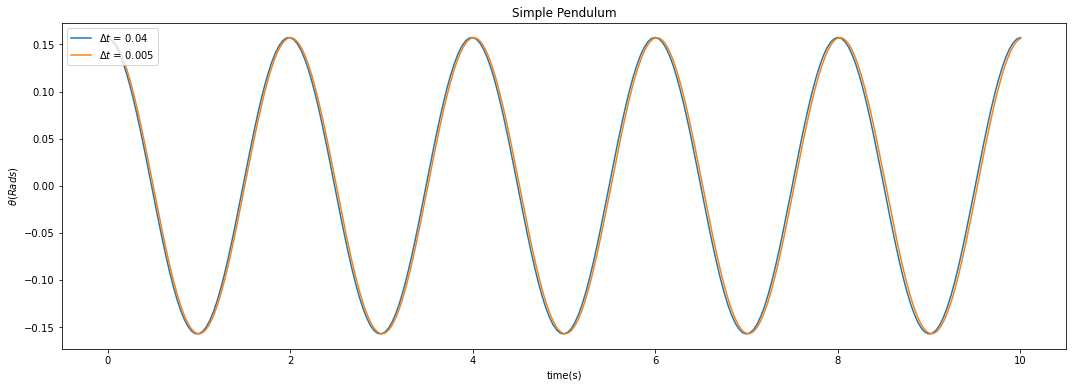

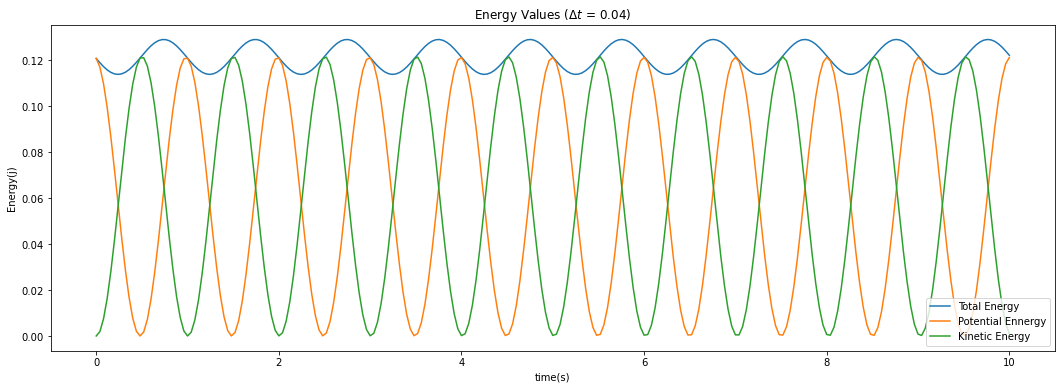

In [5]:
#Initial conditions
tmax = 10
length = 1
InitialAngle = m.pi/20

plt.figure(figsize=(18,6))

#Make first plot
dt = 0.04
time1, theta1, w1, K1, P1, T1 = PendulumEC(length,InitialAngle,0,dt)
plt.plot(time1,theta1,label = r'$\Delta t$ = {}'.format(dt))

#Plot 2nd curve
dt = 0.005
time2, theta2, w2, K2, P2, T2 = PendulumEC(length,InitialAngle,0, dt)
plt.plot(time2,theta2,label = r'$\Delta t$ = {}'.format(dt))

#Format Plot of dt graphs
plt.legend(loc = "upper left")
plt.title('Simple Pendulum')
plt.xlabel('time(s)')
plt.ylabel(r'$\theta (Rads)$')
#Print Plot
plt.show()


#Make Energy plot for graph 1
plt.figure(figsize=(18,6))
plt.title(r'Energy Values ($\Delta t$ = 0.04)')
plt.xlabel('time(s)')
plt.ylabel('Energy(j)')
plt.plot(time1,T1, label = 'Total Energy')
plt.plot(time1,P1, label = 'Potential Ennergy' )
plt.plot(time1,K1, label = 'Kinetic Energy')
plt.legend(loc = 'lower right')
plt.show()

#### Analysis:
The simple pendulum plot shows that the difference in $\Delta t$ does not lead to a large difference in the lines. The Energy values plot does confirm that energy is not properly preserved. The total energy fluctuates.

Value of n: 0.9674625334353265


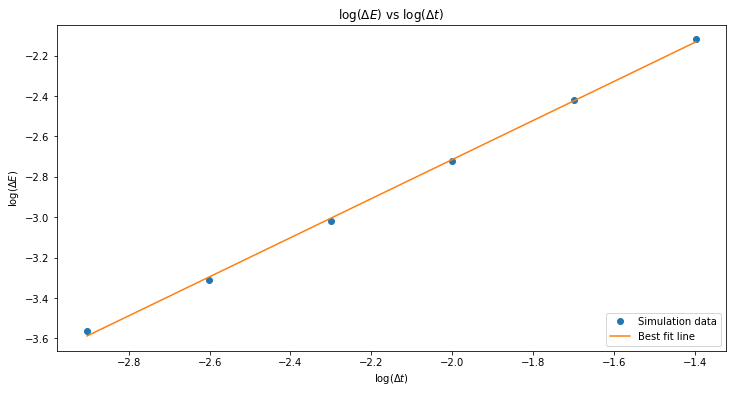

In [6]:
def linearTestFit(x, m, b):
    return x*m + b

#Determin max and min of total energy at the diiffrent level
timeStepValues = [0.04,0.02,0.01,0.005,0.0025,0.00125]
deltaE = np.zeros(len(timeStepValues))
for i in range(len(timeStepValues)):
    timeT, thetaT, wT, KT, PT, TT = PendulumEC(length,InitialAngle,0,timeStepValues[i])
    deltaE[i] = (max(TT) - min(TT))/2
    
logDE = np.log10(deltaE)
logTSV = np.log10(timeStepValues)

#Determin  bnest fit and plot slope:
param, paramCov = curve_fit(linearTestFit, logTSV, logDE)
print('Value of n: {}'.format(param[0]))

#Get best fit line
fitValues = []
for i in logTSV:
    fitValues.append(linearTestFit(i,param[0],param[1]))

plt.figure(figsize=(12,6))
plt.title(r'log($\Delta E$) vs log($\Delta t$)')
plt.xlabel('log($\Delta t$)')
plt.ylabel('log($\Delta E$)')
plt.plot(logTSV,logDE,'o', label = 'Simulation data')
plt.plot(logTSV,fitValues,label = "Best fit line")
plt.legend(loc = 'lower right')
plt.show()

#### Analysis:
When a plot is created of $\Delta E$ vs $\Delta t$ it is seen that the relationship is $\Delta E \alpha \Delta t^n$. In this case n = 0.967.

# 3.An Anharmonic Oscillator with an Asymetrix Force Law

In [7]:
#Define constants
mass = 1
tmin = 0
tmax = 10
dt = 0.005

#Make time array
time = np.arange(tmin,tmax+dt,dt)

def RK2(xo,vo):
    #Make Pos array
    Xpos = np.zeros(len(time))
    Xpos[0] = xo
    vi = vo
    for i in range(1,len(time)):
        xprime =  Xpos[i-1] + 0.5 * dt * vi  
        vprime = vi + 0.5 * dt * ((2*m.pi**2)/3) * (1/Xpos[i-1]**13 - 1/Xpos[i-1]**7)
        
        Xpos[i] = Xpos[i-1] + vprime * dt
        vi = vi + ((2*m.pi**2)/3) * dt * (1/xprime**13 - 1/xprime**7) 
    return Xpos

def U(x):
    return m.pi**2 * (1/x**12 -2/x**6 + 1)

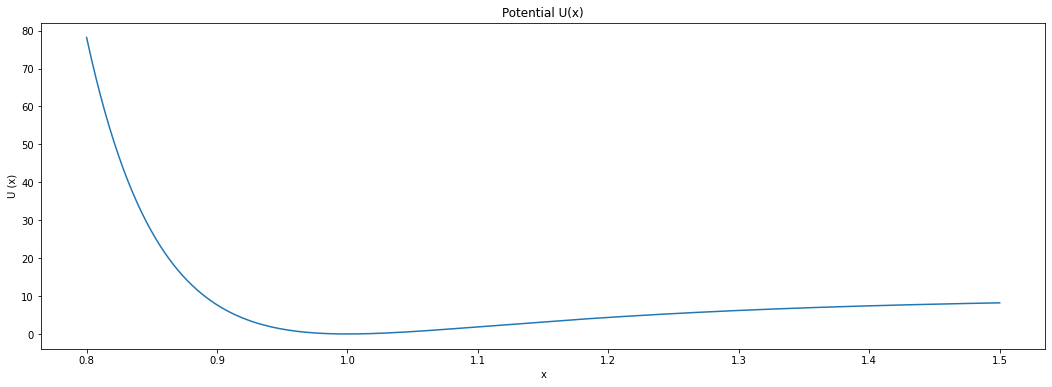

In [8]:
#Plot U(x)
X = np.linspace(.8,1.5,200)
Ux = U(X)

plt.figure(figsize=(18,6))
plt.plot(X,Ux)
plt.title('Potential U(x)')
plt.xlabel('x')
plt.ylabel('U (x)')
plt.show()

#### Analysis:
By plotting the potential U(x) it can easily be seen the equilibrium position is 1. Furthermore, it is seen that to the left of the equilibrium the potential increases much faster than to the right.

The time-average for starting position 1.015 is: 1.001
The time-average for starting position 1.032 is: 1.004


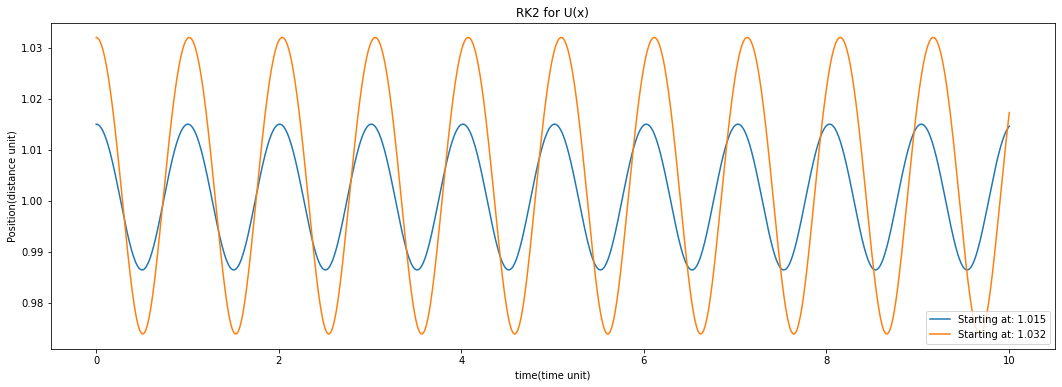

In [9]:
#Graph to find values for time step deviation of 0.001 and 0.004 NOTE:YES I KNOW COULD HAVE LOOPED THIS
Xo = [1.015,1.032]
xValues1 = RK2(Xo[0],0.0)
xValues2 = RK2(Xo[1],0.0)

#Get time-avg
timeAvg1 = np.sum(xValues1)/len(time)
timeAvg2 = np.sum(xValues2)/len(time)
print("The time-average for starting position {} is: {:3.5}".format(Xo[0],timeAvg1))
print("The time-average for starting position {} is: {:3.5}".format(Xo[1],timeAvg2))

#Format and show graph
plt.figure(figsize=(18,6))
plt.plot(time,xValues1, label= 'Starting at: {}'.format(Xo[0]))
plt.plot(time,xValues2, label= 'Starting at: {}'.format(Xo[1]))
plt.title('RK2 for U(x)')
plt.xlabel('time(time unit)')
plt.ylabel('Position(distance unit)')
plt.legend(loc = 'lower right')
plt.show()

#### Analysis:
To achieve a deviation of 0.001 in the time-average the starting position needs to be 1.015. To achieve a deviation of 0.004, a starting value of 1.032 needs be used. This does support the proposition that the average distance from equilibrium is proportional to the energy of the oscillator.

The time-average for string position 1.1 is: 1.03
The time-average for string position 0.9 is: 1.2669


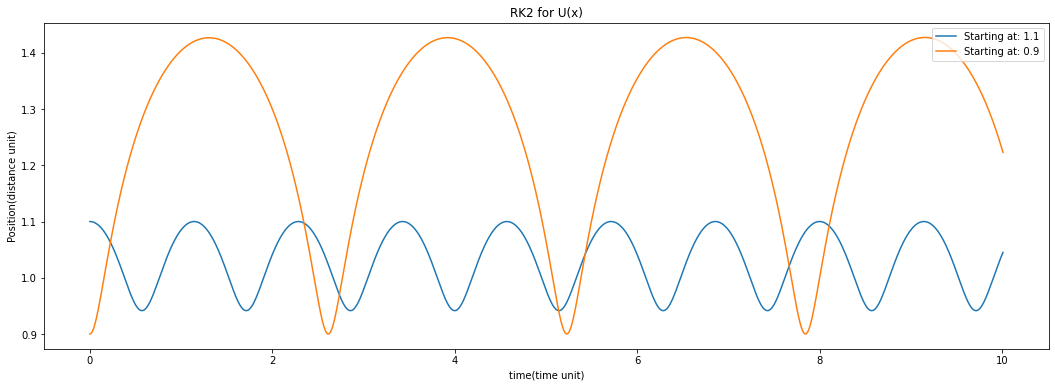

In [10]:
#Graph to show a starting value on either side of eqilibrium. NOTE:YES I KNOW COULD HAVE LOOPED THIS TOO 
Xo = [1.1,0.90]
xValues1 = RK2(Xo[0],0)
xValues2 = RK2(Xo[1],0)

#Get time-avg
timeAvg1 = np.sum(xValues1)/len(time)
timeAvg2 = np.sum(xValues2)/len(time)
print("The time-average for string position {} is: {:3.5}".format(Xo[0],timeAvg1))
print("The time-average for string position {} is: {:3.5}".format(Xo[1],timeAvg2))

#Format and show graph
plt.figure(figsize=(18,6))
plt.plot(time,xValues1, label= 'Starting at: {}'.format(Xo[0]))
plt.plot(time,xValues2, label= 'Starting at: {}'.format(Xo[1]))
plt.title('RK2 for U(x)')
plt.xlabel('time(time unit)')
plt.ylabel('Position(distance unit)')
plt.legend(loc = 'upper right')
plt.show()

#### Analysis:
By starting the particle at a value less than 1, 0.9 in this case, it can be seen it quickly returns to, and passes, the equilibrium position. While the particle is to the right of equilibrium it takes much longer for the particle to return. If the particle starts at 1.1 it starts with much les potential then it did at 0.9, however the trend is still true that when the particle is to the left of equilibrium it will return faster. This is because the potential is not symmetrical.

# 4. Harmonic Generation

In [11]:
#Define constants
tmin = 0
tmax = 20
dt = 0.005
#Make time array
time = np.arange(tmin,tmax+dt,dt)

def RK2b(xo,vo,fo,dragC,wC): #Takes: intial X, initla V, Force at 0, viscus drag constant, wConst
                            #Returns: Pos of X Array
    #Make Pos array
    posX = np.zeros(len(time))
    posX[0] = xo
    vi = vo
    for i in range(1,len(time)):
        #Get Primes
        tprime = time[i] + 0.5 * dt
        xprime = posX[i-1] + 0.5 * dt * vi 
        vprime = vi + 0.5 * dt * (((2*m.pi**2)/3) * (1/posX[i-1]**13 - 1/posX[i-1]**7) - (vi*dragC) + fo * np.cos(wC * time[i]))
        
        #Get orginal values.
        posX[i] = posX[i-1] + vprime * dt
        vi = vi + dt *(((2*m.pi**2)/3) * (1/xprime**13 - 1/xprime**7) - (vprime*dragC) + fo * np.cos(wC*tprime))  
        
    return posX

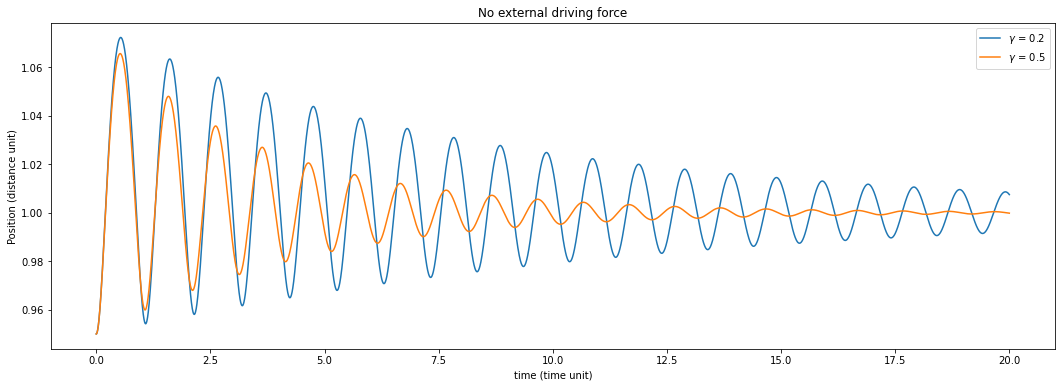

In [12]:
#Confirm Firt bullet point - No driving force,
#Xo=0.95, Vo=0, Fo=0, ViscusDragConst=0.2, wConst= 2pi
xVals = RK2b(0.95,0,0,0.2,2*m.pi)
#Now with the drag constant much higher
xVals2 = RK2b(0.95,0,0,0.5,2*m.pi)

#Format and show graph
plt.figure(figsize=(18,6))
plt.plot(time,xVals, label= '$\gamma$ = {}'.format(0.2))
plt.plot(time,xVals2, label= '$\gamma$ = {}'.format(0.5))
plt.title('No external driving force')
plt.xlabel('time (time unit)')
plt.ylabel('Position (distance unit)')
plt.legend(loc = 'upper right')
plt.show()

##### Confimation 1
With no driving force the harmonic does decay exponentially. A higher value for the drag constant ($ \gamma $) does lead to a faster decay as expected.

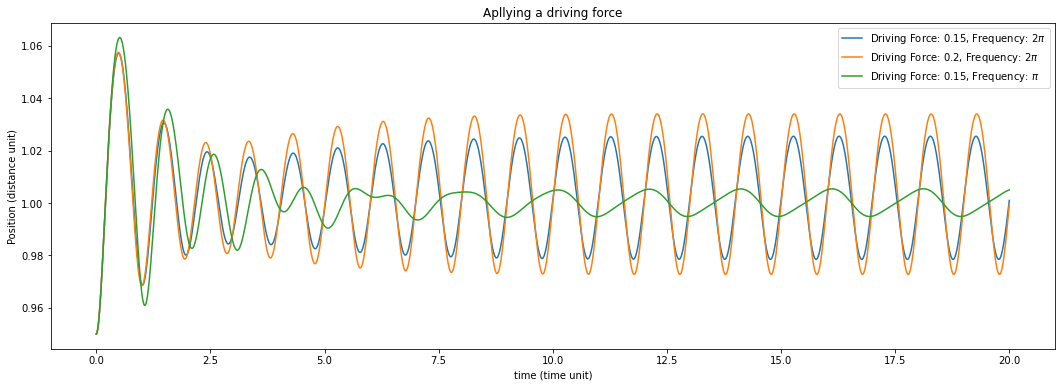

In [13]:
#Test Graph
#Xo=0.95, Vo=0, Fo=0.15, ViscusDragConst=1, wConst= 2pi
xVals = RK2b(0.95,0,0.15,1,2*m.pi)


#Xo=0.95, Vo=0, Fo=0.20, ViscusDragConst=1, wConst= 2pi
xVals3 = RK2b(0.95,0,0.20,1,2*m.pi)

#Xo=0.95, Vo=0, Fo=0.15, ViscusDragConst=1, wConst= pi
xVals2 = RK2b(0.95,0,0.15,1,m.pi)

#Format and show graph
plt.figure(figsize=(18,6))
plt.plot(time,xVals, label= 'Driving Force: {}, Frequency: {} '.format(0.15,'$2\pi$'))
plt.plot(time,xVals3, label= 'Driving Force: {}, Frequency: {} '.format(0.2,'$2\pi$'))
plt.plot(time,xVals2, label= 'Driving Force: {}, Frequency: {} '.format(0.15,'$\pi$'))
plt.title('Apllying a driving force')
plt.xlabel('time (time unit)')
plt.ylabel('Position (distance unit)')
plt.legend(loc = 'upper right')
plt.show()

#### Confirmation 2
With a driving force, after a period the harmonics frequency does match that of the driving frequency. Furthermore, it can be seen the driving force does not affect the frequency. Also, it can easily be seen that the driving force is related to the amplitude.

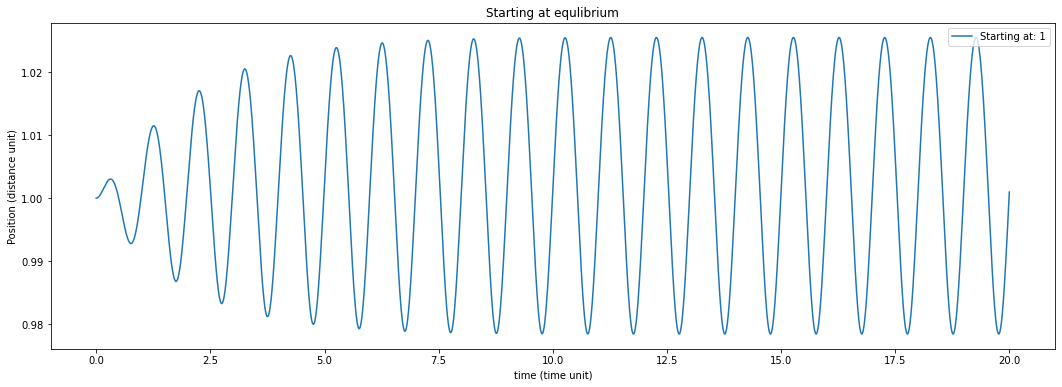

In [14]:
#Test Graph
#Xo=1, Vo=0, Fo=0.15, ViscusDragConst=1, wConst= 2pi
xVals = RK2b(1,0,0.15,1,2*m.pi)

#Format and show graph
plt.figure(figsize=(18,6))
plt.plot(time,xVals, label= 'Starting at: {}'.format(1))
plt.title('Starting at equlibrium')
plt.xlabel('time (time unit)')
plt.ylabel('Position (distance unit)')
plt.legend(loc = 'upper right')
plt.show()

#### Analysis (Graph not asked for)
Upon starting the graph at the equaliobrium position it can be seen the driving force starting the harmonic motion. 

# 5. A Damped, Driven Pendulum

In [15]:
#NOTE: FOR THE LOVE OF GOD I WANTED THIS TO WORK. but could not figure out why it wouldnt
def RK2c(thetao,wo,q,g,length,Fd,OD): #Takes: theta0,w0,q,g,length,Fd,OmegaD
                                      #Returns: Pos of theta Array AND wArray
    #Make Pos array
    ThetaPos = np.zeros(len(time))
    wArray = np.zeros(len(time))
    ThetaPos[0] = thetao
    wArray[0] = wo
    for i in range(1,len(time)):
        #Get prime values
        tPrime = time[i] * 0.5 * dt
        ThetaPrime = ThetaPos[i-1] + 0.5 * dt * wArray[i-1]
        wprime =  wArray[i-1] + 0.5 * dt * ((-1*g/length)*np.sin(ThetaPos[i-1]) - q*wArray[i-1] + Fd*np.sin(OD*time[i-1])) #use thetaPos,wi,ti to find wprime
        
        #Get next theta 
        ThetaPos[i] = ThetaPos[i-1] + dt * wprime
        
        #Constrict theta values
        if ThetaPos[i] < -np.pi:
            ThetaPos[i] = ThetaPos[i] + 2*np.pi
        if ThetaPos[i] > np.pi:
            ThetaPos[i] = ThetaPos[i] - 2*np.pi
        
        #Get new w values
        wArray[i] = wArray[i-1] + dt * ((-1*g/length)*np.sin(ThetaPrime) - q*wprime + Fd*np.sin(OD*tPrime)) #use thetaPrime,wprime,tprime
    return ThetaPos, wArray


#DO EC method. Wont lie, followed your code from the chaotic notebook. I was heavly stuck
def EC3(thetao,wo,q,g,l,FD,OmegaD):
    # Use Euler-Cromer method to solve for motion
    theta = np.zeros(len(time))
    omega = np.zeros(len(time)) 
    theta[0] = thetao
    omega[0] = wo

    for i in np.arange(1,len(time),1):
        omega[i] = omega[i-1] + dt * ((-g/l)*np.sin(theta[i-1]) - q*omega[i-1] + FD*np.sin(OmegaD * time[i-1]))
        theta[i] = theta[i-1] + dt * omega[i]
        
        if theta[i] < -np.pi:
            theta[i] = theta[i] + 2*np.pi
        if theta[i] > np.pi:
            theta[i] = theta[i] - 2*np.pi
    
    return [theta,omega]


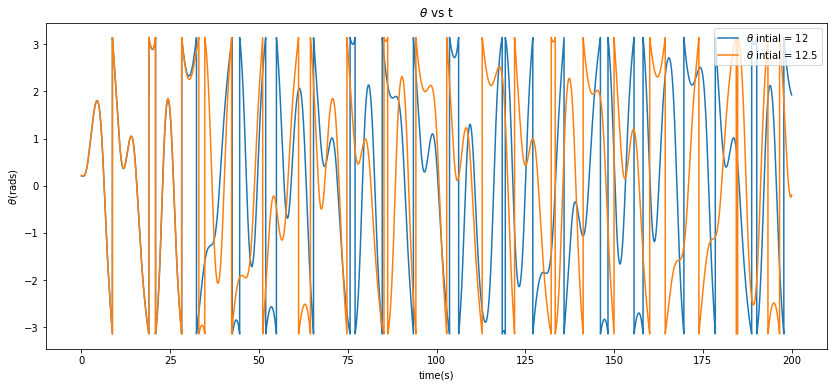

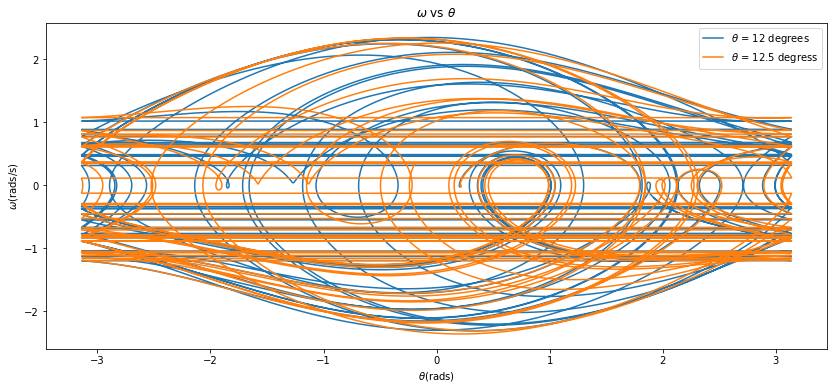

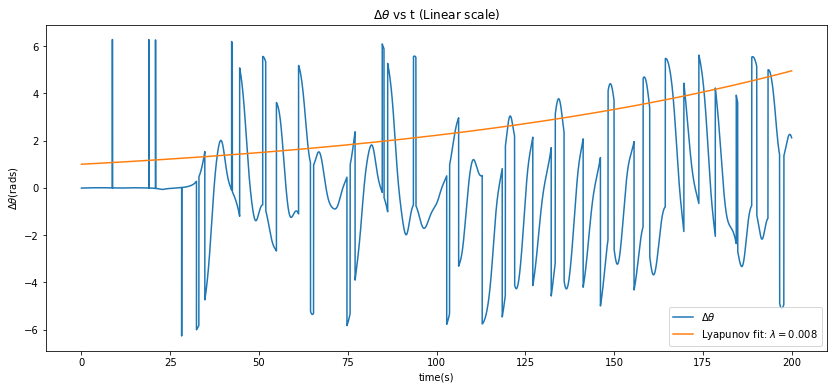

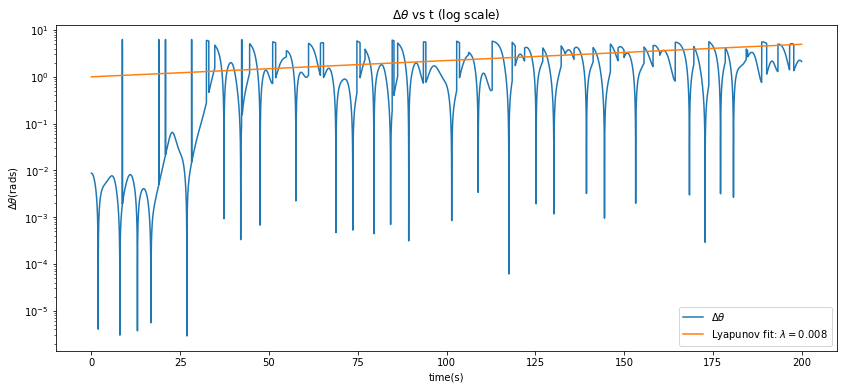

In [16]:
#Define constants for all sets.
q = 0.5
g = 9.8
length = g
OmegaD = 2/3
Fd = 1.2

#Make time array
tmin = 0
tmax = 200
dt = 0.005
time = np.arange(tmin,tmax+dt,dt)

#Deifine intital angles
angle1 = 12
angle2 = 12.5

#Get data and plot theta vs t
plt.figure(figsize=(14,6))
theta1,w1 = EC3(m.radians(angle1),0,q,g,length,Fd,OmegaD)
theta2,w2 = EC3(m.radians(angle2),0,q,g,length,Fd,OmegaD)
plt.title(r'$\theta$ vs t')
plt.plot(time,theta1,label=r'$\theta$ intial = {}'.format(angle1))
plt.plot(time,theta2,label=r'$\theta$ intial = {}'.format(angle2))
plt.xlabel('time(s)')
plt.ylabel(r'$\theta$(rads)')
plt.legend(loc='upper right')
plt.show()

#Plot omega vs theta
plt.figure(figsize=(14,6))
plt.title(r'$\omega$ vs $\theta$')
plt.plot(theta1,w1,label=r'$\theta$ = {} degrees'.format(angle1))
plt.plot(theta2,w2,label=r'$\theta$ = {} degress'.format(angle2))
plt.xlabel(r'$\theta$(rads)')
plt.ylabel(r'$\omega$(rads/s)') 
plt.legend(loc='upper right')
plt.show()

#Get detatheta vs time
deltaTheta = theta1 - theta2


#Create set for Lyapunov 
lam = 0.008
lypXA = m.e**(lam*time)

#Non log plot
plt.figure(figsize=(14,6))
plt.title(r'$\Delta$$\theta$ vs t (Linear scale)')
plt.plot(time,deltaTheta, label = r'$\Delta$$\theta$')
plt.plot(time,lypXA, label = r'Lyapunov fit: $\lambda = {}$'.format(lam))
plt.xlabel("time(s)")
plt.ylabel(r'$\Delta$$\theta$(rads)')
plt.legend(loc='lower right')
plt.show()

#Log plot
deltaTheta = abs(theta1 - theta2)
plt.figure(figsize=(14,6))
plt.title(r'$\Delta$$\theta$ vs t (log scale)')
plt.plot(time,deltaTheta, label = r'$\Delta$$\theta$')
plt.plot(time,lypXA, label = r'Lyapunov fit: $\lambda = {}$'.format(lam))
plt.yscale('log')
plt.xlabel("time(s)")
plt.ylabel(r'$\Delta$$\theta$(rads)')
plt.legend(loc='lower right')
plt.show()




#### Analysis:
A Lyapunov exponent is used to determine how chaotic a system is. For this system, the Lyapunov exponent is equal to 0.008. Initially the system starts as a non-chaotic system. The two motions match well till approximately 25s. At 25s they begin to deviate from one another. Due to this from the times of 0-25s the Lyapunov exponent would be zero. However, after this the Lyapunov exponent would be positive. This means the system is in a chaotic state. To have a single exponent that fit the entire system a small, but still positive value of 0.008 was determined. 

Note: Without a method for a best fit line it was very difficult to determine the correct Lyapunov exponent. There was a ton of possible values depending on if a constant was used. I chose to assume the constant is one. The key takeaway is that the value is greater than zero.